# Numerical Methods using Python (scipy)

## Overview

The core Python language (including the standard libraries) provide enough functionality to carry out computational research tasks. However, there are dedicated (third-party) Python libraries that provide extended functionality which

-   provide numerical tools for frequently occurring tasks

-   which are convenient to use

-   and are more efficient in terms of CPU time and memory requirements than using the code Python functionality alone.

We list three such modules in particular:

-   The `numpy` module provides a data type specialised for “number crunching” of vectors and matrices (this is the `array` type provided by “`numpy`” as introduced in [14-numpy.ipynb](14-numpy.ipynb)), and linear algebra tools.

-   The `matplotlib` package (also knows as `pylab`) provides plotting and visualisation capabilities (see [15-visualising-data.ipynb](15-visualising-data.ipynb)) and the

-   `scipy` package (SCIentific PYthon) which provides a multitude of numerical algorithms and which is introduced in this chapter.

Many of the numerical algorithms available through `scipy` and `numpy` are provided by established compiled libraries which are often written in Fortran or C. They will thus execute much faster than pure Python code (which is interpreted). As a rule of thumb, we expect compiled code to be two orders of magnitude faster than pure Python code.

You can use the help function for each numerical method to find out more about the source of the implementation.

## SciPy

`Scipy` provides many scientific computing functions and is generally complementary to the the functionality of `numpy`. 

First we need to import `scipy`:

In [1]:
import scipy

The `scipy` package provides information about its own structure when we use the help command:

```python
help(scipy)
```

The output is very long, so we're showing just a part of it here:

     cluster                      --- Vector Quantization / Kmeans
     fft                          --- Discrete Fourier transforms
     fftpack                      --- Legacy discrete Fourier transforms
     integrate                    --- Integration routines
     interpolate                  --- Interpolation Tools
     io                           --- Data input and output
     linalg                       --- Linear algebra routines
     linalg.blas                  --- Wrappers to BLAS library
     linalg.lapack                --- Wrappers to LAPACK library
     misc                         --- Various utilities that don't have
                                      another home.
     ndimage                      --- n-dimensional image package
     odr                          --- Orthogonal Distance Regression
     optimize                     --- Optimization Tools
     signal                       --- Signal Processing Tools
     signal.windows               --- Window functions
     sparse                       --- Sparse Matrices
     sparse.linalg                --- Sparse Linear Algebra
     sparse.linalg.dsolve         --- Linear Solvers
     sparse.linalg.dsolve.umfpack --- :Interface to the UMFPACK library:
                                      Conjugate Gradient Method (LOBPCG)
     sparse.linalg.eigen          --- Sparse Eigenvalue Solvers
     sparse.linalg.eigen.lobpcg   --- Locally Optimal Block Preconditioned
                                      Conjugate Gradient Method (LOBPCG)
     spatial                      --- Spatial data structures and algorithms
     special                      --- Special functions
     stats                        --- Statistical Functions
     
     

If we are looking for an algorithm to integrate a function, we might explore the `integrate` package:

```python
import scipy.integrate
```
```text
scipy.integrate?
```

produces:

```text
=============================================
Integration and ODEs (:mod:`scipy.integrate`)
=============================================

.. currentmodule:: scipy.integrate

Integrating functions, given function object
============================================

.. autosummary::
   :toctree: generated/

   quad          -- General purpose integration
   quad_vec      -- General purpose integration of vector-valued functions
   dblquad       -- General purpose double integration
   tplquad       -- General purpose triple integration
   nquad         -- General purpose n-dimensional integration
   fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
   quadrature    -- Integrate with given tolerance using Gaussian quadrature
   romberg       -- Integrate func using Romberg integration
   quad_explain  -- Print information for use of quad
   newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
   IntegrationWarning -- Warning on issues during integration

Integrating functions, given fixed samples
==========================================

.. autosummary::
   :toctree: generated/

   trapz         -- Use trapezoidal rule to compute integral.
   cumtrapz      -- Use trapezoidal rule to cumulatively compute integral.
   simps         -- Use Simpson's rule to compute integral from samples.
   romb          -- Use Romberg Integration to compute integral from
                 -- (2**k + 1) evenly-spaced samples.

.. seealso::

   :mod:`scipy.special` for orthogonal polynomials (special) for Gaussian
   quadrature roots and weights for other weighting factors and regions.

Solving initial value problems for ODE systems
==============================================

The solvers are implemented as individual classes which can be used directly
(low-level usage) or through a convenience function.

.. autosummary::
   :toctree: generated/

   solve_ivp     -- Convenient function for ODE integration.
   RK23          -- Explicit Runge-Kutta solver of order 3(2).
   RK45          -- Explicit Runge-Kutta solver of order 5(4).
   DOP853        -- Explicit Runge-Kutta solver of order 8.
   Radau         -- Implicit Runge-Kutta solver of order 5.
   BDF           -- Implicit multi-step variable order (1 to 5) solver.
   LSODA         -- LSODA solver from ODEPACK Fortran package.
   OdeSolver     -- Base class for ODE solvers.
   DenseOutput   -- Local interpolant for computing a dense output.
   OdeSolution   -- Class which represents a continuous ODE solution.
```

The following sections show examples which demonstrate how to employ the algorithms provided by `scipy`.

## Numerical integration

Scientific Python provides a number of integration routines. A general purpose tool to solve integrals *I* of the kind

$$I=\int_a^b f(x) \mathrm{d} x$$

is provided by the `quad()` function of the `scipy.integrate` module.

It takes as input arguments the function *f*(*x*) to be integrated (the “integrand”), and the lower and upper limits *a* and *b*. It returns two values (in a tuple): the first one is the computed results and the second one is an estimation of the numerical error of that result.

Here is an example: which produces this output:

In [2]:
# NBVAL_IGNORE_OUTPUT
from math import cos, exp, pi
from scipy.integrate import quad

# function we want to integrate
def f(x):
    return exp(cos(-2 * x * pi)) + 3.2

# call quad to integrate f from -2 to 2
res, err = quad(f, -2, 2)

print("The numerical result is {:f} (+-{:g})"
    .format(res, err))

The numerical result is 17.864264 (+-1.55113e-11)


Note that `quad()` takes optional parameters `epsabs` and `epsrel` to increase or decrease the accuracy of its computation. (Use `help(quad)` to learn more.) The default values are `epsabs=1.5e-8` and `epsrel=1.5e-8`. For the next exercise, the default values are sufficient.

### Exercise: integrate a function

1.  Using scipy’s `quad` function, write a program that solves the following integral numerically: $I = \int
_0^1\cos(2\pi x) dx$.

2.  Find the analytical integral and compare it with the numerical solution.

3.  Why is it important to have an estimate of the accuracy (or the error) of the numerical integral?

### Exercise: plot before you integrate

It is good practice to plot the integrand function to check whether it is “well behaved” before you attempt to integrate. Singularities (i.e. $x$ values where the $f(x)$ tends towards minus or plus infinity) or other irregular behaviour (such as $f(x)=\sin(\frac{1}{x}$) close to $x = 0$ are difficult to handle numerically.

1.  Write a function with name `plotquad` which takes the same arguments as the quad command (*i.e.* $f$, $a$ and $b$) and which 
- (i) creates a plot of the integrand $f(x)$ and 
- (ii) computes the integral numerically using the `quad` function. The return values should be as for the `quad` function.

In [3]:
%matplotlib inline
# settings for jupyter book: svg for html version, high-resolution png for pdf
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'png')
# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg', 'png')
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400

## Solving Ordinary Differential Equations (ODEs)

To solve an ordinary differential equation of the type
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = f(y,t)$$

with a given $y(t_0)=y_0$, we can use `scipy`’s `solve_ivp` function. Here is a (self explaining) example program (`usesolve_ivp.py`) to find 

$$y(t) \quad \mathrm{for}\quad t\in[0,2]$$
 given this differential equation:
$$\frac{\mathrm{d}y}{\mathrm{d}t}(t) = -2yt \quad \mathrm{with} \quad y(0)=1.$$

Text(0, 0.5, 'y(t)')

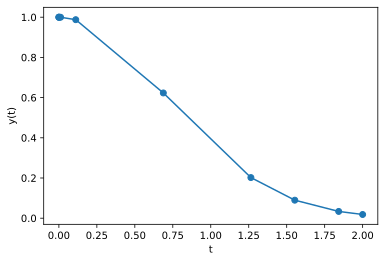

In [4]:
%config InlineBackend.figure_format = 'svg'
from scipy.integrate import solve_ivp
import numpy as np

def f(y, t):
    """this is the rhs of the ODE to integrate, i.e. dy/dt=f(y,t)"""
    return -2 * y * t

y0 = [1]           # initial value y0=y(t0)
a = 0              # integration limits for t: start at t=t0=a
b = 2              # and finish at t=b

sol = solve_ivp(fun=f, t_span=[a, b], y0=y0)  # computation of SOLution 

import pylab          # plotting of results
pylab.plot(sol.t, sol.y[0], 'o-')
pylab.xlabel('t'); pylab.ylabel('y(t)')

We have not given the `solve_ivp` command any guidance for which values of $t$ we would like to know the solution $y(t)$: we have only specified that $t_0 = 0$ and that we would like to know the solution between $t0=a=0$ and $t=b=2$. The solver itself has determined the number of required function evaluations, and returns the corresponding values in `sol.t` and `sol.y[0]`.

We can obtain more data points in a number of ways:

1. Increase the default error tolerance. The relative tolerance (`rtol`) and absolute tolerance (`atol`) default to `1e-3` each. If we increase them, we typically enforce the use of a larger number of intermediate points:

Text(0, 0.5, 'y(t)')

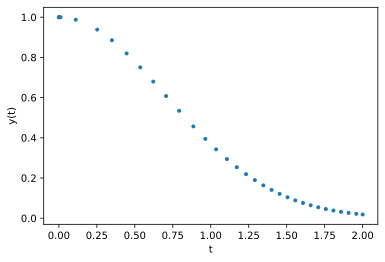

In [5]:
sol = solve_ivp(fun=f, t_span=[a, b], y0=y0, atol=1e-8, rtol=1e-8)

pylab.plot(sol.t, sol.y[0], '.')
pylab.xlabel('t'); pylab.ylabel('y(t)')

2. We can also prescribe the precise locations for which we like to know the solutions $y(t)$:

Text(0, 0.5, 'y(t)')

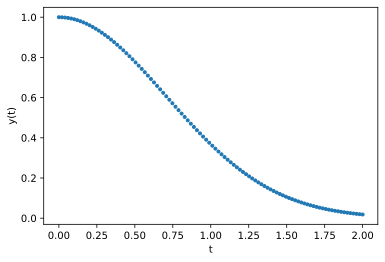

In [6]:
y0 = [1]           # initial value
a = 0              # integration limits for t
b = 2              
ts = np.linspace(a, b, 100)   # 100 points between a and b

sol = solve_ivp(fun=f, t_span=[a, b], y0=y0, t_eval=ts) 

pylab.plot(sol.t, sol.y[0], '.')
pylab.xlabel('t'); pylab.ylabel('y(t)')

The `solve_ivp` command returns a "OdeResult" object, which we have called `sol` in the example above. 

In [7]:
type(sol)

scipy.integrate._ivp.ivp.OdeResult

We have already seen that the solution can be found in `sol.y` and `sol.t`:

In [8]:
type(sol.t)

numpy.ndarray

In [9]:
sol.t.shape

(100,)

In [10]:
type(sol.y)

numpy.ndarray

In [11]:
sol.y.shape

(1, 100)


Other interesting attributes are the number of function evaluations that were necessary (where the function is the function `f` which computes the right hand side of the ODE).

In [12]:
sol.nfev

68

There is also a human-readable string, providing - for this example - a re-assuring message:

In [13]:
sol.message

'The solver successfully reached the end of the integration interval.'

A machine readable status is available in the `sol.status` attribute (0 is good):

In [14]:
sol.status

0

The `solve_ivp` command takes a number of optional parameters - we have already seen `atol` and `rtol` to change the default error tolerance of the integration. We can use the help command to explore these. The help string also explains the attributes of the solution object in more detail:

```python
help(scipy.integrate.solve_ivp)
```

will show:

```
Help on function solve_ivp in module scipy.integrate._ivp.ivp:

solve_ivp(fun, t_span, y0, method='RK45', t_eval=None, dense_output=False, events=None, vectorized=False, args=None, **options)
    Solve an initial value problem for a system of ODEs.
    
    This function numerically integrates a system of ordinary differential
    equations given an initial value::
    
        dy / dt = f(t, y)
        y(t0) = y0
    
    Here t is a 1-D independent variable (time), y(t) is an
    N-D vector-valued function (state), and an N-D
    vector-valued function f(t, y) determines the differential equations.
    The goal is to find y(t) approximately satisfying the differential
    equations, given an initial value y(t0)=y0.
    
    Some of the solvers support integration in the complex domain, but note
    that for stiff ODE solvers, the right-hand side must be
    complex-differentiable (satisfy Cauchy-Riemann equations [11]_).
    To solve a problem in the complex domain, pass y0 with a complex data type.
    Another option always available is to rewrite your problem for real and
    imaginary parts separately.
    
    Parameters
    ----------
    fun : callable
        Right-hand side of the system. The calling signature is ``fun(t, y)``.
        Here `t` is a scalar, and there are two options for the ndarray `y`:
        It can either have shape (n,); then `fun` must return array_like with
        shape (n,). Alternatively, it can have shape (n, k); then `fun`
        must return an array_like with shape (n, k), i.e., each column
        corresponds to a single column in `y`. The choice between the two
        options is determined by `vectorized` argument (see below). The
        vectorized implementation allows a faster approximation of the Jacobian
        by finite differences (required for stiff solvers).
    t_span : 2-tuple of floats
        Interval of integration (t0, tf). The solver starts with t=t0 and
        integrates until it reaches t=tf.
    y0 : array_like, shape (n,)
        Initial state. For problems in the complex domain, pass `y0` with a
        complex data type (even if the initial value is purely real).
    method : string or `OdeSolver`, optional
        Integration method to use:
    
            * 'RK45' (default): Explicit Runge-Kutta method of order 5(4) [1]_.
              The error is controlled assuming accuracy of the fourth-order
              method, but steps are taken using the fifth-order accurate
              formula (local extrapolation is done). A quartic interpolation
              polynomial is used for the dense output [2]_. Can be applied in
              the complex domain.
            * 'RK23': Explicit Runge-Kutta method of order 3(2) [3]_. The error
              is controlled assuming accuracy of the second-order method, but
              steps are taken using the third-order accurate formula (local
              extrapolation is done). A cubic Hermite polynomial is used for the
              dense output. Can be applied in the complex domain.
            * 'DOP853': Explicit Runge-Kutta method of order 8 [13]_.
              Python implementation of the "DOP853" algorithm originally
              written in Fortran [14]_. A 7-th order interpolation polynomial
              accurate to 7-th order is used for the dense output.
              Can be applied in the complex domain.
            * 'Radau': Implicit Runge-Kutta method of the Radau IIA family of
              order 5 [4]_. The error is controlled with a third-order accurate
              embedded formula. A cubic polynomial which satisfies the
              collocation conditions is used for the dense output.
            * 'BDF': Implicit multi-step variable-order (1 to 5) method based
              on a backward differentiation formula for the derivative
              approximation [5]_. The implementation follows the one described
              in [6]_. A quasi-constant step scheme is used and accuracy is
              enhanced using the NDF modification. Can be applied in the
              complex domain.
            * 'LSODA': Adams/BDF method with automatic stiffness detection and
              switching [7]_, [8]_. This is a wrapper of the Fortran solver
              from ODEPACK.
    
        Explicit Runge-Kutta methods ('RK23', 'RK45', 'DOP853') should be used
        for non-stiff problems and implicit methods ('Radau', 'BDF') for
        stiff problems [9]_. Among Runge-Kutta methods, 'DOP853' is recommended
        for solving with high precision (low values of `rtol` and `atol`).
    
        If not sure, first try to run 'RK45'. If it makes unusually many
        iterations, diverges, or fails, your problem is likely to be stiff and
        you should use 'Radau' or 'BDF'. 'LSODA' can also be a good universal
        choice, but it might be somewhat less convenient to work with as it
        wraps old Fortran code.
    
        You can also pass an arbitrary class derived from `OdeSolver` which
        implements the solver.
    t_eval : array_like or None, optional
        Times at which to store the computed solution, must be sorted and lie
        within `t_span`. If None (default), use points selected by the solver.
    dense_output : bool, optional
        Whether to compute a continuous solution. Default is False.
    events : callable, or list of callables, optional
        Events to track. If None (default), no events will be tracked.
        Each event occurs at the zeros of a continuous function of time and
        state. Each function must have the signature ``event(t, y)`` and return
        a float. The solver will find an accurate value of `t` at which
        ``event(t, y(t)) = 0`` using a root-finding algorithm. By default, all
        zeros will be found. The solver looks for a sign change over each step,
        so if multiple zero crossings occur within one step, events may be
        missed. Additionally each `event` function might have the following
        attributes:
    
            terminal: bool, optional
                Whether to terminate integration if this event occurs.
                Implicitly False if not assigned.
            direction: float, optional
                Direction of a zero crossing. If `direction` is positive,
                `event` will only trigger when going from negative to positive,
                and vice versa if `direction` is negative. If 0, then either
                direction will trigger event. Implicitly 0 if not assigned.
    
        You can assign attributes like ``event.terminal = True`` to any
        function in Python.
    vectorized : bool, optional
        Whether `fun` is implemented in a vectorized fashion. Default is False.
    args : tuple, optional
        Additional arguments to pass to the user-defined functions.  If given,
        the additional arguments are passed to all user-defined functions.
        So if, for example, `fun` has the signature ``fun(t, y, a, b, c)``,
        then `jac` (if given) and any event functions must have the same
        signature, and `args` must be a tuple of length 3.
    options
        Options passed to a chosen solver. All options available for already
        implemented solvers are listed below.
    first_step : float or None, optional
        Initial step size. Default is `None` which means that the algorithm
        should choose.
    max_step : float, optional
        Maximum allowed step size. Default is np.inf, i.e., the step size is not
        bounded and determined solely by the solver.
    rtol, atol : float or array_like, optional
        Relative and absolute tolerances. The solver keeps the local error
        estimates less than ``atol + rtol * abs(y)``. Here `rtol` controls a
        relative accuracy (number of correct digits). But if a component of `y`
        is approximately below `atol`, the error only needs to fall within
        the same `atol` threshold, and the number of correct digits is not
        guaranteed. If components of y have different scales, it might be
        beneficial to set different `atol` values for different components by
        passing array_like with shape (n,) for `atol`. Default values are
        1e-3 for `rtol` and 1e-6 for `atol`.
    jac : array_like, sparse_matrix, callable or None, optional
        Jacobian matrix of the right-hand side of the system with respect
        to y, required by the 'Radau', 'BDF' and 'LSODA' method. The
        Jacobian matrix has shape (n, n) and its element (i, j) is equal to
        ``d f_i / d y_j``.  There are three ways to define the Jacobian:
    
            * If array_like or sparse_matrix, the Jacobian is assumed to
              be constant. Not supported by 'LSODA'.
            * If callable, the Jacobian is assumed to depend on both
              t and y; it will be called as ``jac(t, y)``, as necessary.
              For 'Radau' and 'BDF' methods, the return value might be a
              sparse matrix.
            * If None (default), the Jacobian will be approximated by
              finite differences.
    
        It is generally recommended to provide the Jacobian rather than
        relying on a finite-difference approximation.
    jac_sparsity : array_like, sparse matrix or None, optional
        Defines a sparsity structure of the Jacobian matrix for a finite-
        difference approximation. Its shape must be (n, n). This argument
        is ignored if `jac` is not `None`. If the Jacobian has only few
        non-zero elements in *each* row, providing the sparsity structure
        will greatly speed up the computations [10]_. A zero entry means that
        a corresponding element in the Jacobian is always zero. If None
        (default), the Jacobian is assumed to be dense.
        Not supported by 'LSODA', see `lband` and `uband` instead.
    lband, uband : int or None, optional
        Parameters defining the bandwidth of the Jacobian for the 'LSODA'
        method, i.e., ``jac[i, j] != 0 only for i - lband <= j <= i + uband``.
        Default is None. Setting these requires your jac routine to return the
        Jacobian in the packed format: the returned array must have ``n``
        columns and ``uband + lband + 1`` rows in which Jacobian diagonals are
        written. Specifically ``jac_packed[uband + i - j , j] = jac[i, j]``.
        The same format is used in `scipy.linalg.solve_banded` (check for an
        illustration).  These parameters can be also used with ``jac=None`` to
        reduce the number of Jacobian elements estimated by finite differences.
    min_step : float, optional
        The minimum allowed step size for 'LSODA' method.
        By default `min_step` is zero.
    
    Returns
    -------
    Bunch object with the following fields defined:
    t : ndarray, shape (n_points,)
        Time points.
    y : ndarray, shape (n, n_points)
        Values of the solution at `t`.
    sol : `OdeSolution` or None
        Found solution as `OdeSolution` instance; None if `dense_output` was
        set to False.
    t_events : list of ndarray or None
        Contains for each event type a list of arrays at which an event of
        that type event was detected. None if `events` was None.
    y_events : list of ndarray or None
        For each value of `t_events`, the corresponding value of the solution.
        None if `events` was None.
    nfev : int
        Number of evaluations of the right-hand side.
    njev : int
        Number of evaluations of the Jacobian.
    nlu : int
        Number of LU decompositions.
    status : int
        Reason for algorithm termination:
    
            * -1: Integration step failed.
            *  0: The solver successfully reached the end of `tspan`.
            *  1: A termination event occurred.
    
    message : string
        Human-readable description of the termination reason.
    success : bool
        True if the solver reached the interval end or a termination event
        occurred (``status >= 0``).
```

### Systems of coupled ODEs

We want to show one example of two first-order ODEs that are coupled. This helps to understand why the initial value `y0` in the above example had to be provided in a list (`[y0]`) and why the solution is `sol.y[0]` rather than just `sol.y`.

We use the [Predator and prey example](http://www.scholarpedia.org/article/Predator-prey_model). Let
- $p_1(t)$ be the number of rabbits and
- $p_2(t)$ be the number of foxes at a given time $t$

To compute the time dependence of $p_1$ and $p_2$:
- Assume that rabbits proliferate at a rate $a$. Per unit time a number $a p_1$ of rabbits is born.
- Number of rabbits is reduced by collisions with foxes. Per unit time $c p_1 p_2$ rabbits are eaten.
- Assume that birth rate of foxes depends only on food intake in form of rabbits.
- Assume that foxes die a natural death at a rate $b$.
  
We use the following parameters:

- rabbit birth rate $a = 0.7$
- rabbit-fox-collision rate $ c = 0.007$
- fox death rate $b = 1$

We put this together into the system of coupled ordinary differential equations:
  \begin{eqnarray}
    \label{eq:predprey}
    \frac{d p_1}{dt} &=& a p_1 - c p_1 p_2\nonumber\\
    \frac{d p_1}{dt} &=& c p_1 p_2 - b p_2\nonumber
  \end{eqnarray}

We want to solve this for $p_1(0)=70$ and $p_2(0)=50$ as initial values, for 30 units of time.


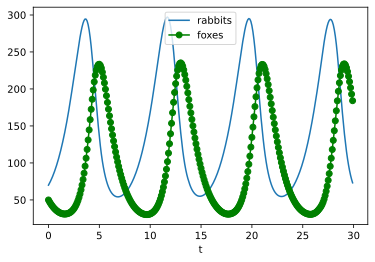

In [15]:
import pylab
import numpy as np
from scipy.integrate import solve_ivp


def rhs(t, y):
    a = 0.7
    c = 0.007
    b = 1
    p1 = y[0]
    p2 = y[1]

    dp1dt = a * p1 - c * p1 * p2
    dp2dt = c * p1 * p2 - b * p2

    return np.array([dp1dt, dp2dt])


p0 = [70, 50]      # initial condition
t0 = 0
tfinal = 30
ts = np.arange(t0, tfinal, 0.1)

sol = solve_ivp(rhs, [t0, tfinal], p0, t_eval=ts)

p1 = sol.y[0]                # extract p1 and
p2 = sol.y[1]                # p2

pylab.plot(sol.t, p1, label='rabbits')
pylab.plot(sol.t, p2, '-og', label='foxes')
pylab.legend()
pylab.xlabel('t')
pylab.savefig('predprey.pdf')
pylab.savefig('predprey.png')


## Root finding

If you try to find a $x$ such that
$$f(x)=0$$
then this is called *root finding*. Note that problems like $g(x)=h(x)$ fall in this category as you can rewrite them as $f(x)=g(x)−h(x)=0$.

A number of root finding tools are available in `scipy`’s `optimize` module.

### Root finding using the bisection method

First we introduce the `bisect` algorithm which is (i) robust and (ii) slow but conceptually very simple.

Suppose we need to compute the roots of *f*(*x*)=*x*<sup>3</sup> − 2*x*<sup>2</sup>. This function has a (double) root at *x* = 0 (this is trivial to see) and another root which is located between *x* = 1.5 (where *f*(1.5)= − 1.125) and *x* = 3 (where *f*(3)=9). It is pretty straightforward to see that this other root is located at *x* = 2. Here is a program that determines this root numerically:

In [16]:
from scipy.optimize import bisect

def f(x):
    """returns f(x)=x^3-2x^2. Has roots at
    x=0 (double root) and x=2"""
    return x ** 3 - 2 * x ** 2

# main program starts here
x = bisect(f, 1.5, 3, xtol=1e-6)

print("The root x is approximately x=%14.12g,\n"
      "the error is less than 1e-6." % (x))
print("The exact error is %g." % (2 - x))

The root x is approximately x= 2.00000023842,
the error is less than 1e-6.
The exact error is -2.38419e-07.


The `bisect()` method takes three compulsory arguments: (i) the function *f*(*x*), (ii) a lower limit *a* (for which we have chosen 1.5 in our example) and (ii) an upper limit *b* (for which we have chosen 3). The optional parameter `xtol` determines the maximum error of the method.

One of the requirements of the bisection method is that the interval \[*a*, *b*\] has to be chosen such that the function is either positive at *a* and negative at *b*, or that the function is negative at *a* and postive at *b*. In other words: *a* and *b* have to enclose a root.

### Exercise: root finding using the bisect method

1.  Write a program with name `sqrttwo.py` to determine an approximation of $\sqrt{2}$ by finding a root *x* of the function $f(x)=2 − x^2$ using the bisection algorithm. Choose a tolerance for the approximation of the root of 10<sup>−8</sup>.

2.  Document your choice of the initial bracket $[a, b]$ for the root: which values have you chosen for *a* and for *b* and why?

3.  Study the results:

    -   Which value for the root *x* does the bisection algorithm return?

    -   Compute the value of $\\sqrt{2}$ using `math.sqrt(2)` and compare this with the approximation of the root. How big is the absolute error of *x*? How does this compare with `xtol`?

### Root finding using the `fsolve` funcion

A (often) better (in the sense of “more efficient”) algorithm than the bisection algorithm is implemented in the general purpose `fsolve()` function for root finding of (multidimensional) functions. This algorithm needs only one starting point close to the suspected location of the root (but is not garanteed to converge).

Here is an example:

In [17]:
from scipy.optimize import fsolve

def f(x):
    return x ** 3 - 2 * x ** 2

x = fsolve(f, 3)           # one root is at x=2.0

print("The root x is approximately x=%21.19g" % x)
print("The exact error is %g." % (2 - x))

The root x is approximately x= 2.000000000000006661
The exact error is -6.66134e-15.


The return value[6] of `fsolve` is a numpy array of length *n* for a root finding problem with *n* variables. In the example above, we have *n* = 1.

## Interpolation

Given a set of *N* points $(x_i, y_i)$ with $i = 1, 2, …N$, we sometimes need a function $\hat{f}(x)$ which returns $y_i = f(x_i)$ where $x == x_i$, and which in addition provides some interpolation of the data $(x_i, y_i)$ for all $x$.

The function `y0 = scipy.interpolate.interp1d(x,y,kind=’nearest’)` does this interpolation based on splines of varying order. Note that the function `interp1d` returns *a function* `y0` which will then interpolate the x-y data for any given $x$ when called as $y0(x)$.

The code below demonstrates this, and shows the different interpolation kinds.

Text(0.5, 0, 'x')

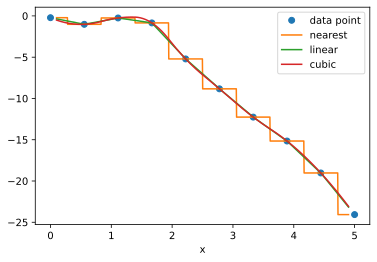

In [18]:
import numpy as np
import scipy.interpolate
import pylab

def create_data(n):
    """Given an integer n, returns n data points
    x and values y as a numpy.array."""
    xmax = 5.
    x = np.linspace(0, xmax, n)
    y = - x**2
    #make x-data somewhat irregular
    y += 1.5 * np.random.normal(size=len(x))
    return x, y

#main program
n = 10
x, y = create_data(n)

#use finer and regular mesh for plot
xfine = np.linspace(0.1, 4.9, n * 100)
#interpolate with piecewise constant function (p=0)
y0 = scipy.interpolate.interp1d(x, y, kind='nearest')
#interpolate with piecewise linear func (p=1)
y1 = scipy.interpolate.interp1d(x, y, kind='linear')
#interpolate with piecewise constant func (p=2)
y2 = scipy.interpolate.interp1d(x, y, kind='quadratic')

pylab.plot(x, y, 'o', label='data point')
pylab.plot(xfine, y0(xfine), label='nearest')
pylab.plot(xfine, y1(xfine), label='linear')
pylab.plot(xfine, y2(xfine), label='cubic')
pylab.legend()
pylab.xlabel('x')

## Curve fitting

We have already seen in [the numpy chapter](14-numpy.ipynb) that we can fit polynomial functions through a data set using the `numpy.polyfit` function. Here, we introduce a more generic curve fitting algorithm.

Scipy provides a somewhat generic function (based on the Levenburg-Marquardt algorithm )through `scipy.optimize.curve_fit` to fit a given (Python) function to a given data set. The assumption is that we have been given a set of data with points $x_1, x_2, …x_N$ and with corresponding function values $y_i$ and a dependence of $y_i$ on $x_i$ such that $y_i=f(x_i,\vec{p})$. We want to determine the parameter vector $\vec{p}=(p_1, p_2, \ldots,
p_k)$ so that $r$, the sum of the residuals, is as small as possible:

$$r = \sum\limits_{i=1}^N \left(y_i - f(x_i, \vec{p})\right)^2$$

Curve fitting is of particular use if the data is noisy: for a given $x_i$ and $y_i=f(x_i,\vec{p})$ we have a (unknown) error term $\epsilon_i$ so that $y_i=f(x_i,\vec{p})+\epsilon_i$.

We use the following example to clarify this:
$$f(x,\vec{p}) = a \exp(-b x) + c, \quad\mathrm{i.e.}\quad \vec{p}=\mathtt{a,b,c}$$

Optimal parameters are a=2.51679, b=1.17111, and c=0.443087


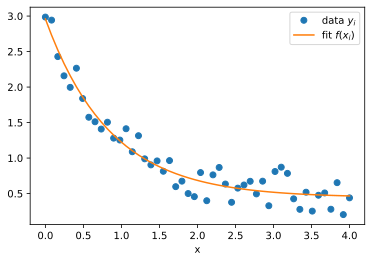

In [19]:
# NBVAL_IGNORE_OUTPUT
import numpy as np
from scipy.optimize import curve_fit


def f(x, a, b, c):
    """Fit function y=f(x,p) with parameters p=(a,b,c). """
    return a * np.exp(- b * x) + c

#create fake data
x = np.linspace(0, 4, 50)
y = f(x, a=2.5, b=1.3, c=0.5)
#add noise
yi = y + 0.2 * np.random.normal(size=len(x))

#call curve fit function
popt, pcov = curve_fit(f, x, yi)
a, b, c = popt
print("Optimal parameters are a=%g, b=%g, and c=%g" % (a, b, c))

#plotting
import pylab
yfitted = f(x, *popt)   # equivalent to f(x, popt[0], popt[1], popt[2])
pylab.plot(x, yi, 'o', label='data $y_i$')
pylab.plot(x, yfitted, '-', label='fit $f(x_i)$')
pylab.xlabel('x')
pylab.legend()

Note that in the source code above we define the fitting function $y = f(x)$ through Python code. We can thus fit (nearly) arbitrary functions using the `curve_fit` method.

The `curve_fit` function returns a tuple `popt, pcov`. The first entry `popt` contains a tuple of the OPTimal Parameters (in the sense that these minimise equation (\[eq:1\]). The second entry contains the covariance matrix for all parameters. The diagonals provide the variance of the parameter estimations.

For the curve fitting process to work, the Levenburg-Marquardt algorithm needs to start the fitting process with initial guesses for the final parameters. If these are not specified (as in the example above), the value “1.0“ is used for the initial guess.

If the algorithm fails to fit a function to data (even though the function describes the data reasonably), we need to give the algorithm better estimates for the initial parameters. For the example shown above, we could give the estimates to the `curve_fit` function by changing the line

```python
popt, pcov = curve_fit(f, x, yi)
```

to

```python
popt, pcov = curve_fit(f, x, yi, p0=(2, 1, 0.6))
```

if our initial guesses would be *a* = 2, *b* = 1 and *c* = 0.6. Once we take the algorithm “roughly in the right area” in parameter space, the fitting usually works well.

## Fourier transforms

In the next example, we create a signal as a superposition of a 50 Hz and 70 Hz sine wave (with a slight phase shift between them). We then Fourier transform the signal and plot the absolute value of the (complex) discrete Fourier transform coefficients against frequency, and expect to see peaks at 50Hz and 70Hz.

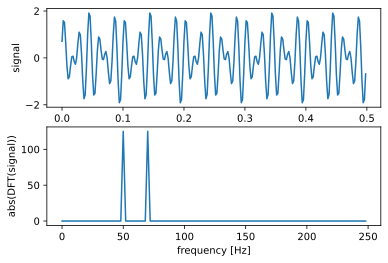

In [20]:
import scipy.fft
import numpy as np
import matplotlib.pyplot as plt
pi = scipy.pi

signal_length = 0.5     # [seconds]
sample_rate = 500       # sampling rate [Hz]
dt = 1. / sample_rate   # time between two samples [s]

df = 1 / signal_length  # frequency between points in
                        # in frequency domain [Hz] 
t = np.arange(0, signal_length, dt)  # the time vector
n_t = len(t)            # length of time vector

# create signal
y = np.sin(2*pi*50*t) + np.sin(2*pi*70*t+pi/4)

# compute Fourier transform
f = scipy.fft.fft(y)

# work out meaningful frequencies in Fourier transform
freqs = df * np.arange(0, (n_t-1)/2., dtype='d')  # 'd'=double precision float
n_freq = len(freqs)

# plot input data y against time
plt.subplot(2, 1, 1)
plt.plot(t, y, label='input data')
plt.xlabel('time [s]')
plt.ylabel('signal')

#plot frequency spectrum 
plt.subplot(2, 1, 2)
plt.plot(freqs, abs(f[0:n_freq]),
         label='abs(fourier transform)')
plt.xlabel('frequency [Hz]')
plt.ylabel('abs(DFT(signal))');

The lower plot shows the discrete Fourier transform computed from the data shown in the upper plot.

## Optimisation

Often we need to find the maximum or minimum of a particular function *f*(*x*) where *f* is a scalar function but *x* could be a vector. Typical applications are the minimisation of entities such as cost, risk and error, or the maximisation of productivity, efficiency and profit. Optimisation routines typically provide a method to minimise a given function: if we need to maximise *f*(*x*) we create a new function *g*(*x*) that reverses the sign of *f*, i.e. *g*(*x*)= − *f*(*x*) and we minimise *g*(*x*).

Below, we provide an example showing (i) the definition of the test function and (ii) the call of the `scipy.optimize.fmin` function which takes as argument a function *f* to minimise and an initial value *x*<sub>0</sub> from which to start the search for the minimum, and which returns the value of *x* for which *f*(*x*) is (locally) minimised. Typically, the search for the minimum is a local search, i.e. the algorithm follows the local gradient. We repeat the search for the minimum for two values (*x*<sub>0</sub> = 1.0 and *x*<sub>0</sub> = 2.0, respectively) to demonstrate that depending on the starting value we may find different minimar of the function *f*.

The majority of the commands (after the two calls to `fmin`) in the file `fmin1.py` creates the plot of the function, the start points for the searches and the minima obtained:

Optimization terminated successfully.
         Current function value: -2.023866
         Iterations: 16
         Function evaluations: 32
Start search at x=1., minimum is [0.23964844]
Optimization terminated successfully.
         Current function value: -1.000529
         Iterations: 16
         Function evaluations: 32
Start search at x=2., minimum is [3.13847656]


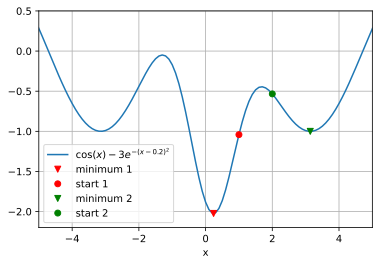

In [21]:
from numpy import arange, cos, exp
from scipy.optimize import fmin
import pylab

def f(x):
    return cos(x) - 3 * exp( -(x - 0.2) ** 2)

# find minima of f(x),
# starting from 1.0 and 2.0 respectively
minimum1 = fmin(f, 1.0)
print("Start search at x=1., minimum is", minimum1)
minimum2 = fmin(f, 2.0)
print("Start search at x=2., minimum is", minimum2)

# plot function
x = arange(-10, 10, 0.1)
y = f(x)
pylab.plot(x, y, label='$\cos(x)-3e^{-(x-0.2)^2}$')
pylab.xlabel('x')
pylab.grid()
pylab.axis([-5, 5, -2.2, 0.5])

# add minimum1 to plot
pylab.plot(minimum1, f(minimum1), 'vr',
           label='minimum 1')
# add start1 to plot
pylab.plot(1.0, f(1.0), 'or', label='start 1')

# add minimum2 to plot
pylab.plot(minimum2,f(minimum2),'vg',\
           label='minimum 2')
# add start2 to plot
pylab.plot(2.0,f(2.0),'og',label='start 2')

pylab.legend(loc='lower left')

Calling the `fmin` function will produce some diagnostic output, which you can also see above.

**Return value of `fmin`**

Note that the return value from the `fmin` function is a numpy `array` which – for the example above – contains only one number as we have only one parameter (here *x*) to vary. In general, `fmin` can be used to find the minimum in a higher-dimensional parameter space if there are several parameters. In that case, the numpy array would contain those parameters that minimise the objective function. The objective function $f(x)$ has to return a scalar even if there are more parameters, i.e. even if $x$ is a vector as in $f(\mathbf{x})$.

## Other numerical methods

Scientific Python and Numpy provide access to a large number of other numerical algorithms including function interpolation, Fourier transforms, optimisation, special functions (such as Bessel functions), signal processing and filters, random number generation, and more. Start to explore `scipy`’s and `numpy`’s capabilities using the `help` function and the documentation provided on the web.

## scipy.io: Scipy-input output

Scipy provides routines to read and write Matlab `mat` files. Here is an example where we create a Matlab compatible file storing a (1x11) matrix, and then read this data into a numpy array from Python using the scipy Input-Output library:

First we create a mat file in Octave (Octave is \[mostly\] compatible with Matlab):

```octave
octave:1> a=-1:0.5:4
a =
Columns 1 through 6:
   -1.0000   -0.5000    0.0000    0.5000    1.0000    1.5000    
Columns 7 through 11:
   2.0000    2.5000   3.0000    3.5000    4.0000
octave:2> save -6 octave_a.mat a       %save as version 6
```

Then we load this array within python:

In [22]:
from scipy.io import loadmat
mat_contents = loadmat('static/data/octave_a.mat')

In [23]:
mat_contents

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Aug  8 12:21:36 2016',
 '__version__': '1.0',
 '__globals__': [],
 'a': array([[-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]])}

In [24]:
mat_contents['a']

array([[-1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ]])

The function `loadmat` returns a dictionary: the key for each item in the dictionary is a string which is the name of that array when it was saved in Matlab. The key is the actual array.

A Matlab matrix file can hold several arrays. Each of those is presented by one key-value pair in the dictionary.

Let’s save two arrays from Python to demonstrate that:

In [25]:
import scipy.io
import numpy as np

# create two numpy arrays
a = np.linspace(0, 50, 11)
b = np.ones((4, 4))

# save as mat-file
# create dictionary for savemat
tmp_d = {'a': a,
         'b': b}
scipy.io.savemat('data.mat', tmp_d)

This program creates the file `data.mat`, which we can subsequently read using Matlab or here Octave:

    HAL47:code fangohr$ octave
    GNU Octave, version 3.2.4
    Copyright (C) 2009 John W. Eaton and others.
    <snip>

    octave:1> whos
    Variables in the current scope:

      Attr Name        Size                     Bytes  Class
      ==== ====        ====                     =====  ===== 
           ans         1x11                        92  cell

    Total is 11 elements using 92 bytes

    octave:2> load data.mat
    octave:3> whos
    Variables in the current scope:

      Attr Name        Size                     Bytes  Class
      ==== ====        ====                     =====  ===== 
           a          11x1                         88  double
           ans         1x11                        92  cell
           b           4x4                        128  double

    Total is 38 elements using 308 bytes

    octave:4> a
    a =

        0
        5
       10
       15
       20
       25
       30
       35
       40
       45
       50

    octave:5> b
    b =

       1   1   1   1
       1   1   1   1
       1   1   1   1
       1   1   1   1

Note that there are other functions to read from and write to in formats as used by IDL, Netcdf and other formats in `scipy.io`.

More → see [Scipy tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/io.html).